## Learning outcomes
1. image histogram: distribution grayscale values
2. Enhance constrast: scalar multiplication on image, histogram equalization and its variant called CLAHE.
3. Thresholding: global thresholding and otsu thresolding
4. Morphological operations (limit our discusiion on binary image)
5. Color spaces: HSV color space used to perform color based segmentation.

## Setup

In [1]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from util_func import *



##  Image histogram

In [2]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [3]:
# There are 2 ways to compute histogram
# %timeit hist = cv.calcHist([gray], [0], None, [256], [0, 256])
# %timeit hist, _ = np.histogram(gray.flatten(),256)

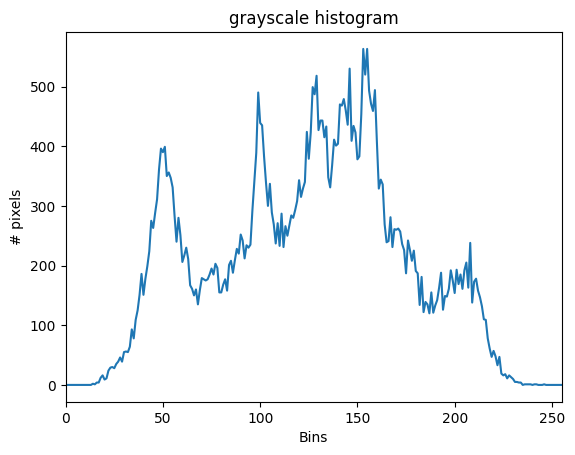

In [4]:
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0,255])
plt.show()

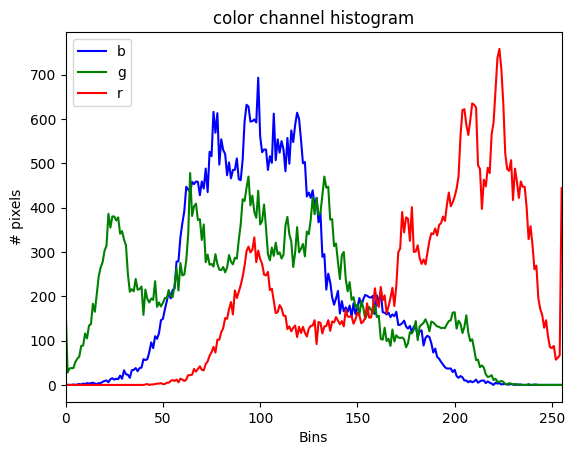

In [5]:
# get the histogram for every channel

channels = cv.split(img)
colors = ("b","g","r")

plt.figure()
plt.title("color channel histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for ch, color in zip (channels,colors):
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color, label=color)
    
plt.xlim([0,255])
plt.legend()
plt.show()

In [6]:
img = cv.imread ("images/low_contrast_img.jfif",0)
show_img("low contrast",img)

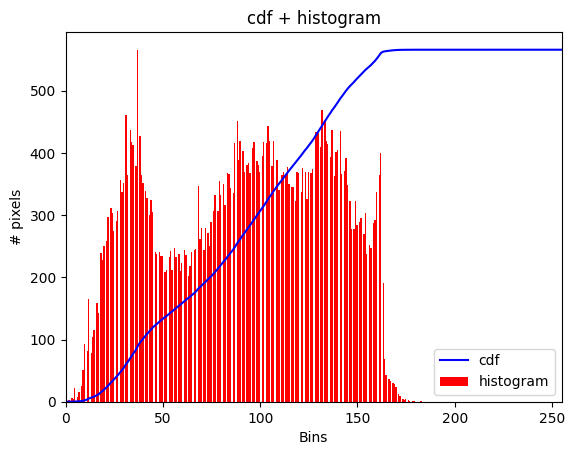

In [7]:
# histogram
hist = cv.calcHist([img],[0],None,[256],[0,256])

# cdf
cdf = hist.cumsum()
cdf_norm = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_norm, color="b")
plt.hist(img.flatten(),256,color="r")
plt.title("cdf + histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.legend(("cdf","histogram"))
plt.xlim([0,255])
plt.show()

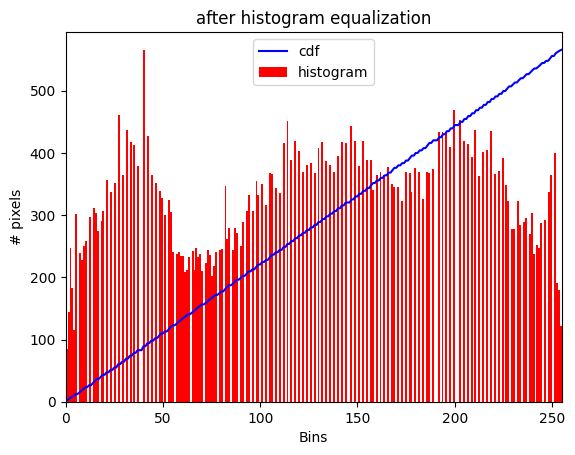

In [8]:
#histogram equalization
eq = cv.equalizeHist(img)

hist = cv.calcHist([eq],[0],None,[256],[0,256])

#cdf
cdf = hist.cumsum()
cdf_norm = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_norm, color="b")
plt.hist(eq.flatten(),256,color="r")
plt.title("after histogram equalization")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.legend(("cdf","histogram"))
plt.xlim([0,255])
plt.show()

In [9]:
# CLAHE
img = cv.imread("images/dog1.jfif",0)

#equalization
eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit=3,tileGridSize = (8,8))
dst = clahe.apply(img)

cv.imshow("Original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)

## Exercise 1
Try histogram equalization and CLAHE on 'winter.jfif' and display the results together with the original grayscale image. Comment on the results obtained.

In [10]:
# CLAHE
img = cv.imread("images/winter.jfif",0)

#equalization
eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit=3,tileGridSize = (8,8))
dst = clahe.apply(img)

cv.imshow("Original",img)
cv.imshow("equalization",eq)
show_img("clahe",dst)

## Thresholding

In [11]:
# simple global thresholding
# different types of thresholding
[i for i in dir(cv) if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [12]:
img = np.fromfunction(lambda i,j:j,(50,256),dtype = np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img,x,255,cv.THRESH_BINARY)
    _, img2 = cv.threshold(img,x,255,cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img,x,255,cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img,x,255,cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img,x,255,cv.THRESH_TOZERO_INV)
    
    cv.imshow("window",np.vstack((img1,img2,img3,img4,img5)))
    
cv.namedWindow("window")
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Simple global threshold vs Otsu thresholding

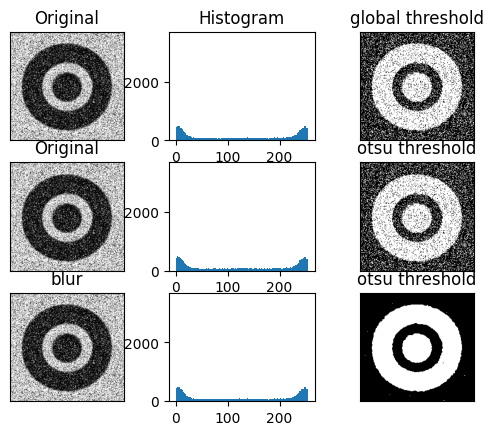

In [13]:
# apply 3 approaches: 1. global threshold, 2. Otsu threshold, 3. blurring + Otsu
img = cv.imread("images/noisy.jfif",0)

# 1
th1 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)[1]

# 2
th2 = cv.threshold(img,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# 3
blur = cv.GaussianBlur(img,(5,5),0)
th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img, 0, th1,
       img, 0, th2,
       img, 0, th3]

titles = ("Original","Histogram","global threshold",
         "Original","", "otsu threshold",
         "blur","","otsu threshold")

for i in range(3):
    plt.subplot(3,3,3*i+1),plt_img(imgs[3*i],title=titles[3*i])
    plt.subplot(3,3,3*i+2),plt.hist(imgs[3*i].flatten(),256),
    plt.title(titles[3*i+1])
    plt.subplot(3,3,3*i+3),plt_img(imgs[3*i+2],title=titles[3*i+2])
    
plt.show()

## Exercise
Plot the histogram of 'wood_planck.jfif'. Then, apply thresholding to segment the wooden planck.

## Morphological operations

In [14]:
# kernel
kernel = np.ones((3,3),np.uint8)

#erosion
erosion = cv.erode(th3, kernel, iterations=1)

# combined
img_combined = np.hstack((th3,erosion))

show_img("erosion",img_combined)

In [15]:
# trackbar: function and while loop
def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size",wn,3,10,nothing)
cv.createTrackbar("iter",wn,3,10,nothing)

while (1):
    # retrieve the size and # iteration
    size = cv.getTrackbarPos("size",wn)
    if size<3:
        size=3
        
    iteration = cv.getTrackbarPos("iter",wn)
    if iteration<1:
        iteration=1
         
    kernel= np.ones((size,size),dtype=np.uint8)
    
    #closing
    closing = cv.morphologyEx(th3,cv.MORPH_CLOSE, kernel, iterations=iteration)
    
    cv.imshow(wn,closing)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
        
cv.destroyAllWindows()

In [16]:
cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

## Color spaces
- RGB / BGR ( prevalent image formats)
- HSV (hue, saturation, value)
    * hue encode color (angular, 0-359). In OpenCV, 0-179
    * saturation implies color purity
    * value: brightnes(higher value, more light). 0 is dark.
- L\*a\*b:
    - L denotes brightness / luminance while a and b are color channels.
    - perceptual uniformity

In [17]:
# sharpen
img = cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

l, a, b = cv.split(img_lab)

# process just the l channel
# sharpen
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
l_sharpen = cv.filter2D(l,-1,kernel)

#merge
sharpen = cv.merge((l_sharpen, a,b))

# change to bgr
shrpen = cv.cvtColor(sharpen,cv.COLOR_LAB2BGR)

cv.imshow("Original",img)
show_img("sharpen",sharpen)

## Demo on color based segmentation


In [18]:
img = cv.imread("images/color_space/pant.jfif")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

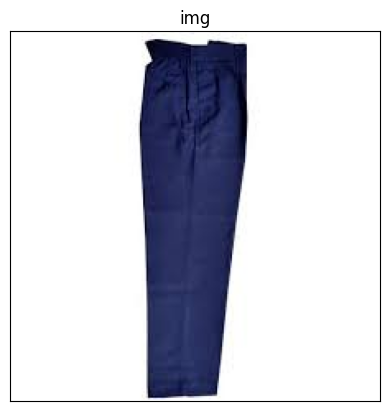

In [19]:
plt_img(img,"img")

In [20]:
## import depencies
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

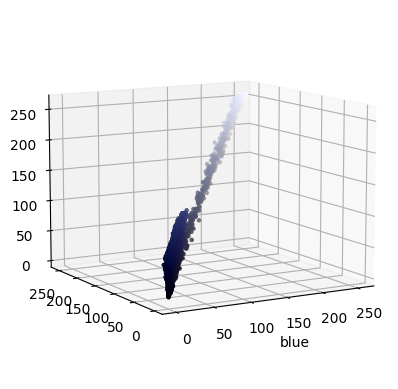

In [21]:
#split the image into seperate channels
r, g, b = cv.split(img)
# set up 3D figure
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")

# pixel colors ready as argument for scatter plot
pixel_colors = img.reshape((-1,3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(),
            facecolors = pixel_colors, marker=".")
axis.view_init(elev=10, azim=240)
axis.set_xlabel("red")
axis.set_xlabel("green")
axis.set_xlabel("blue")
plt.show()

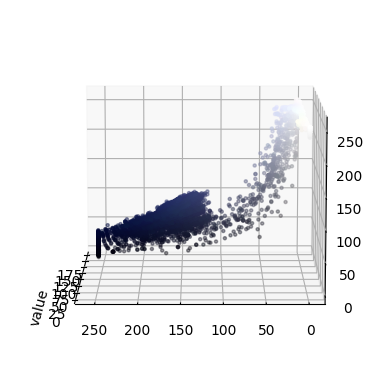

In [22]:
img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)

#split the image into seperate channels
h, s, v = cv.split(img_hsv)
# set up 3D figure
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(),
            facecolors = pixel_colors, marker=".")
axis.view_init(elev=10, azim=180)
axis.set_xlabel("hue")
axis.set_xlabel("saturation")
axis.set_xlabel("value")
plt.show()

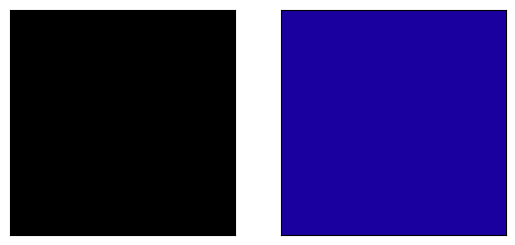

In [23]:
blue_low = (85, 90, 0)
blue_high = (125, 255, 160)

square1 = np.full((10,10,3),blue_low,dtype=np.uint8)
square2 = np.full((10,10,3),blue_high,dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1,cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2,cv.COLOR_HSV2RGB))
plt.show()

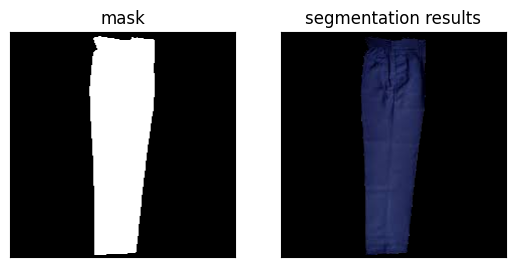

In [24]:
# color based segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)
plt.subplot(121), plt_img(mask,title="mask")
plt.subplot(122), plt_img(res,title="segmentation results")
plt.show()

## Exercise
- Does the segmentation generalize to other blue pant images?
    - Import all blue pant images ("pant1.jfif" - "pant5.jfif")
    - Perform color segmentation
    - Display the results
The results should be as shown below: 
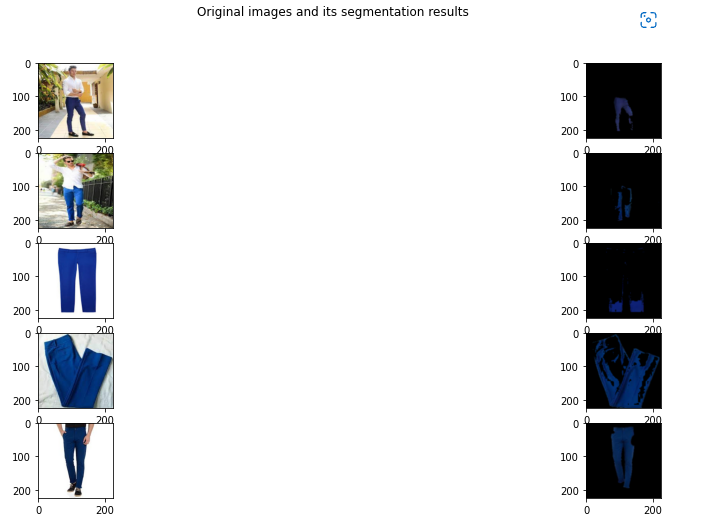

In [25]:
def color_seg(img,color_low,color_high,smooth=True):
    """
    Args:
    img:source image
    color_low and color_high are tuple of colors
    smmoth is boolean (blurring or not)
    """
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
        
    # change from RGB to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # mask
    mask = cv.inRange(img_hsv,color_low,color_high)
    mask = cv.erode(mask,None,iterations=2)
    mask = cv.dilate(mask,None,iterations=2)
    
    return cv.bitwise_and(ori_img,ori_img,mask=mask)

imgs=[]

for i in range(1,6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
# perform color segmentation
res = [color_seg(im, blue_low, blue_high) for im in imgs]

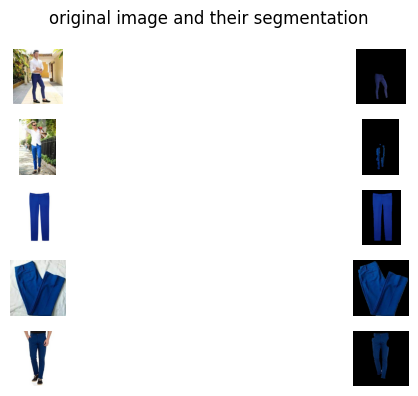

In [26]:
fig, ax = plt.subplots(5,2,figsize=(10,4))

for i in range (5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("original image and their segmentation")
plt.tight_layout()
plt.show()

## Weekly Activity 1
Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

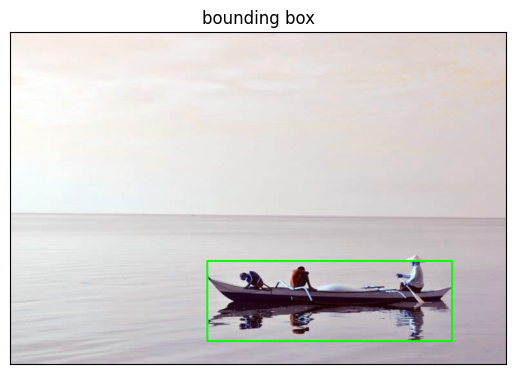

In [27]:
img = cv.imread("images/boat.jpg")
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

thre = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

contours = cv.findContours(thre, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

img_copy = img.copy()

for contour in contours:
    # adjust threshold
    if cv.contourArea(contour) > 500:
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt_img(img_copy, "bounding box")

## Weekly Activity 2
Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [28]:
img = cv.imread("images/leaf.jfif", 0)

thre = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while (1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
        

    kernel = np.ones((size, size), dtype=np.uint8)

    erosion = cv.erode(thre, kernel, iterations=iteration)
    dilation = cv.dilate(thre, kernel, iterations=iteration)
    opening = cv.morphologyEx(thre, cv.MORPH_OPEN, kernel, iterations=iteration)
    closing = cv.morphologyEx(thre, cv.MORPH_CLOSE, kernel, iterations=iteration)

    combined_img = np.hstack((erosion, dilation, opening, closing))
    
    cv.imshow(wn, combined_img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

## Weekly Activity 3
Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [29]:
img = cv.imread("images/color_space/porcelain2.jfif")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

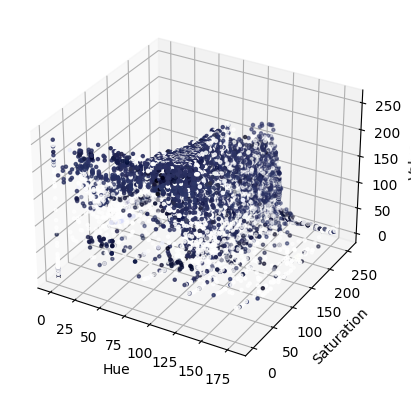

In [30]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(), 
            facecolors=pixel_colors, marker=".")
axis.view_init(elev=30, azim=300)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

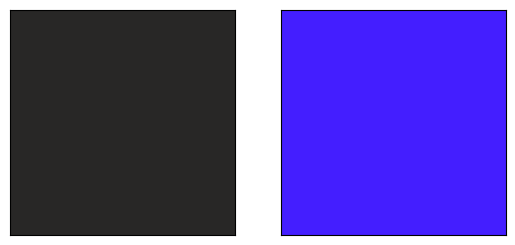

In [40]:
blue_low = (20, 15, 40)
blue_high = (125, 225, 255)

square1 = np.full((10,10,3),blue_low,dtype=np.uint8)
square2 = np.full((10,10,3),blue_high,dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1,cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2,cv.COLOR_HSV2RGB))
plt.show()

In [41]:
def color_seg(img,color_low,color_high,smooth=True):
    """
    Args:
    img:source image
    color_low and color_high are tuple of colors
    smmoth is boolean (blurring or not)
    """
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
        
    # change from RGB to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # mask
    mask = cv.inRange(img_hsv,color_low,color_high)
    mask = cv.erode(mask,None,iterations=2)
    mask = cv.dilate(mask,None,iterations=2)
    
    return cv.bitwise_and(ori_img,ori_img,mask=mask)

imgs=[]

for i in range(1,6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
# perform color segmentation
res = [color_seg(im, blue_low, blue_high) for im in imgs]

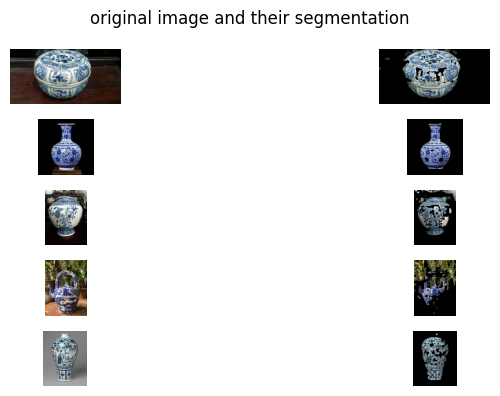

In [42]:
fig, ax = plt.subplots(5,2,figsize=(10,4))

for i in range (5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("original image and their segmentation")
plt.tight_layout()
plt.show()